In [1]:
import os
import sys
import numpy as np
import pandas as pd
from scipy.misc import imread, imresize
import scipy.io as sio
import matplotlib.pylab as plt
from scipy.ndimage import uniform_filter
import seaborn as sns
import bokeh.io
import bokeh.mpl
import bokeh.plotting
import time
import hashlib
from PIL import Image, ImageFilter
import random
import cv2


%load_ext autoreload
%autoreload 1
%matplotlib inline
%config InlineBackend.figure_formats = {'jpg', 'retina'}

# Plotting parameters

In [2]:
rc = {'lines.linewidth': 2,
      'figure.size': (4, 4),
      'axes.labelsize': 10, 
      'axes.titlesize': 10, 
      'axes.facecolor': 'DFDFE5',
      'axes.linecolor': 'white'}

sns.set_context('notebook', rc=rc)
sns.set_style('whitegrid', rc=rc)
bokeh.io.output_notebook()

Loading BokehJS ...

# Check if you have the data

In [3]:
# Make sure you have the data, if not check out notebooks/readme.md
assert(os.path.exists("../svhn/interim/train.npz"))
assert(os.path.exists("../svhn/interim/test.npz"))
assert(os.path.exists("../svhn/interim/valid.npz"))
print("Got the data we need!")

Got the data we need!


# Load the data

In [4]:
def load_data(name):
    data = np.load("../svhn/interim/{}.npz".format(name))
    images = data["{}_dataset".format(name)]
    labels = data["{}_labels".format(name)]
    return images, labels

In [5]:
train_images, train_labels = load_data("train")
test_images, test_labels = load_data("test")
valid_images, valid_labels = load_data("valid")

# Graph the data

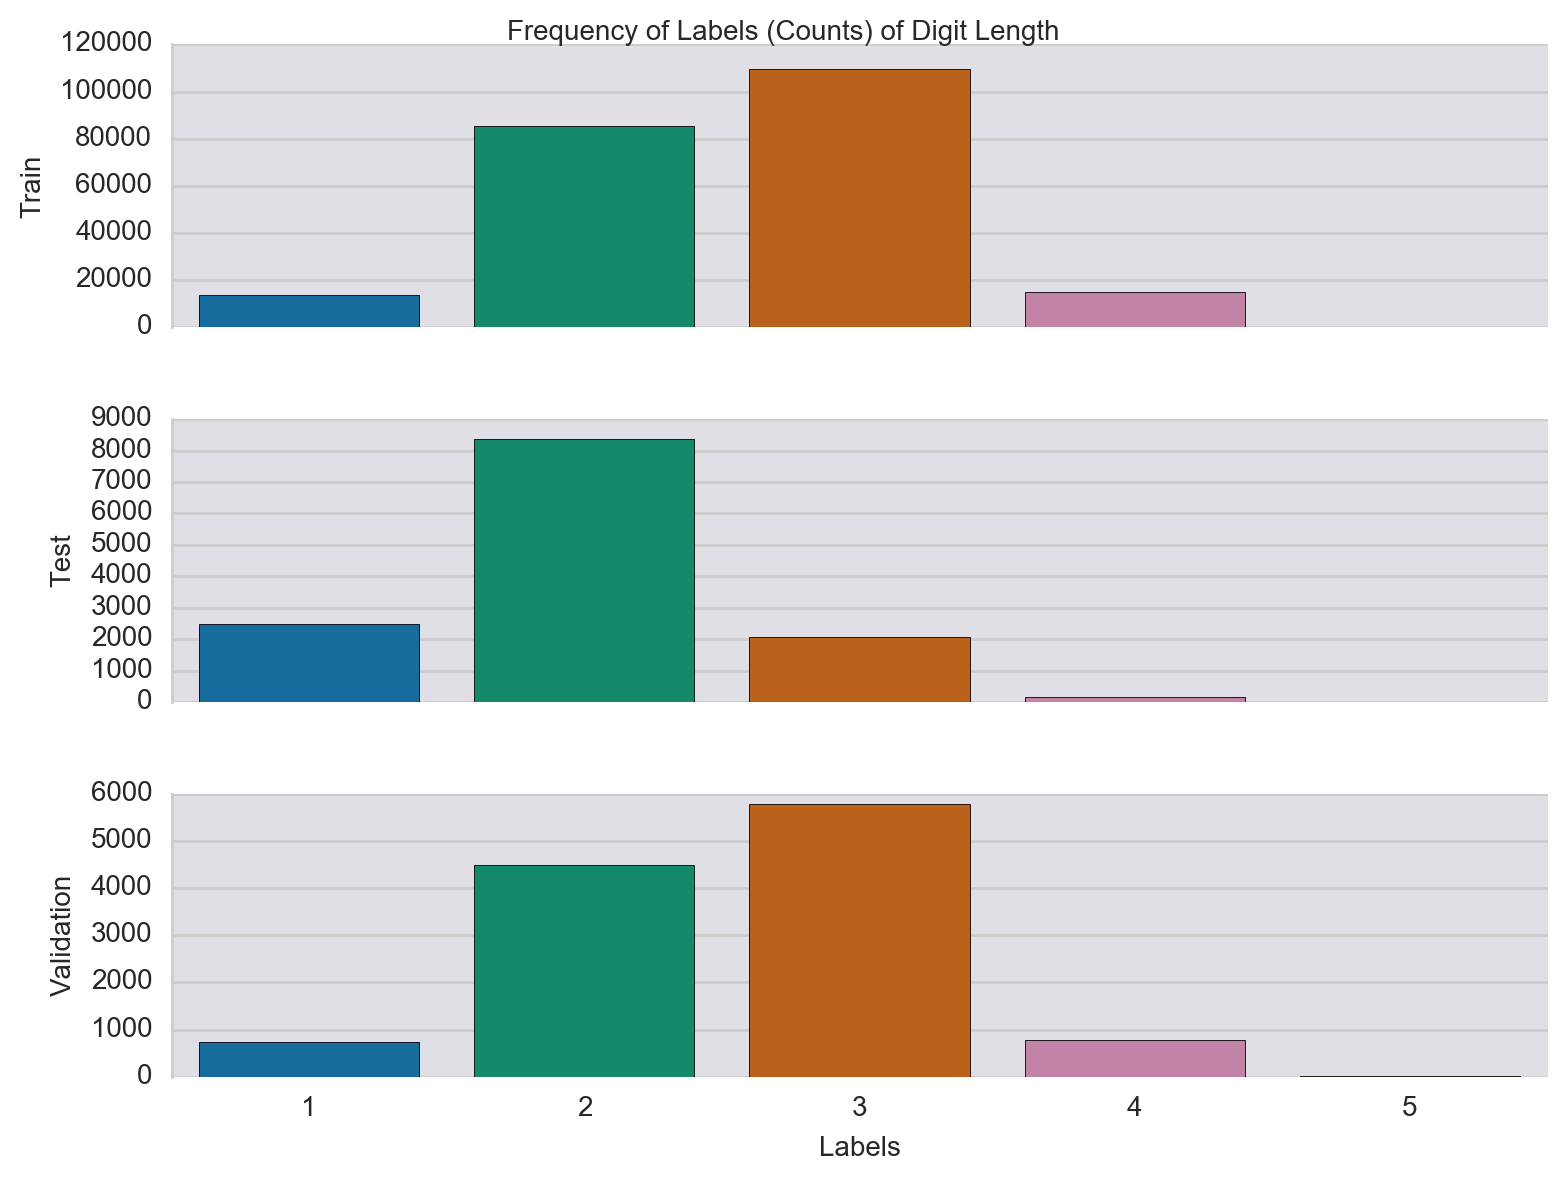

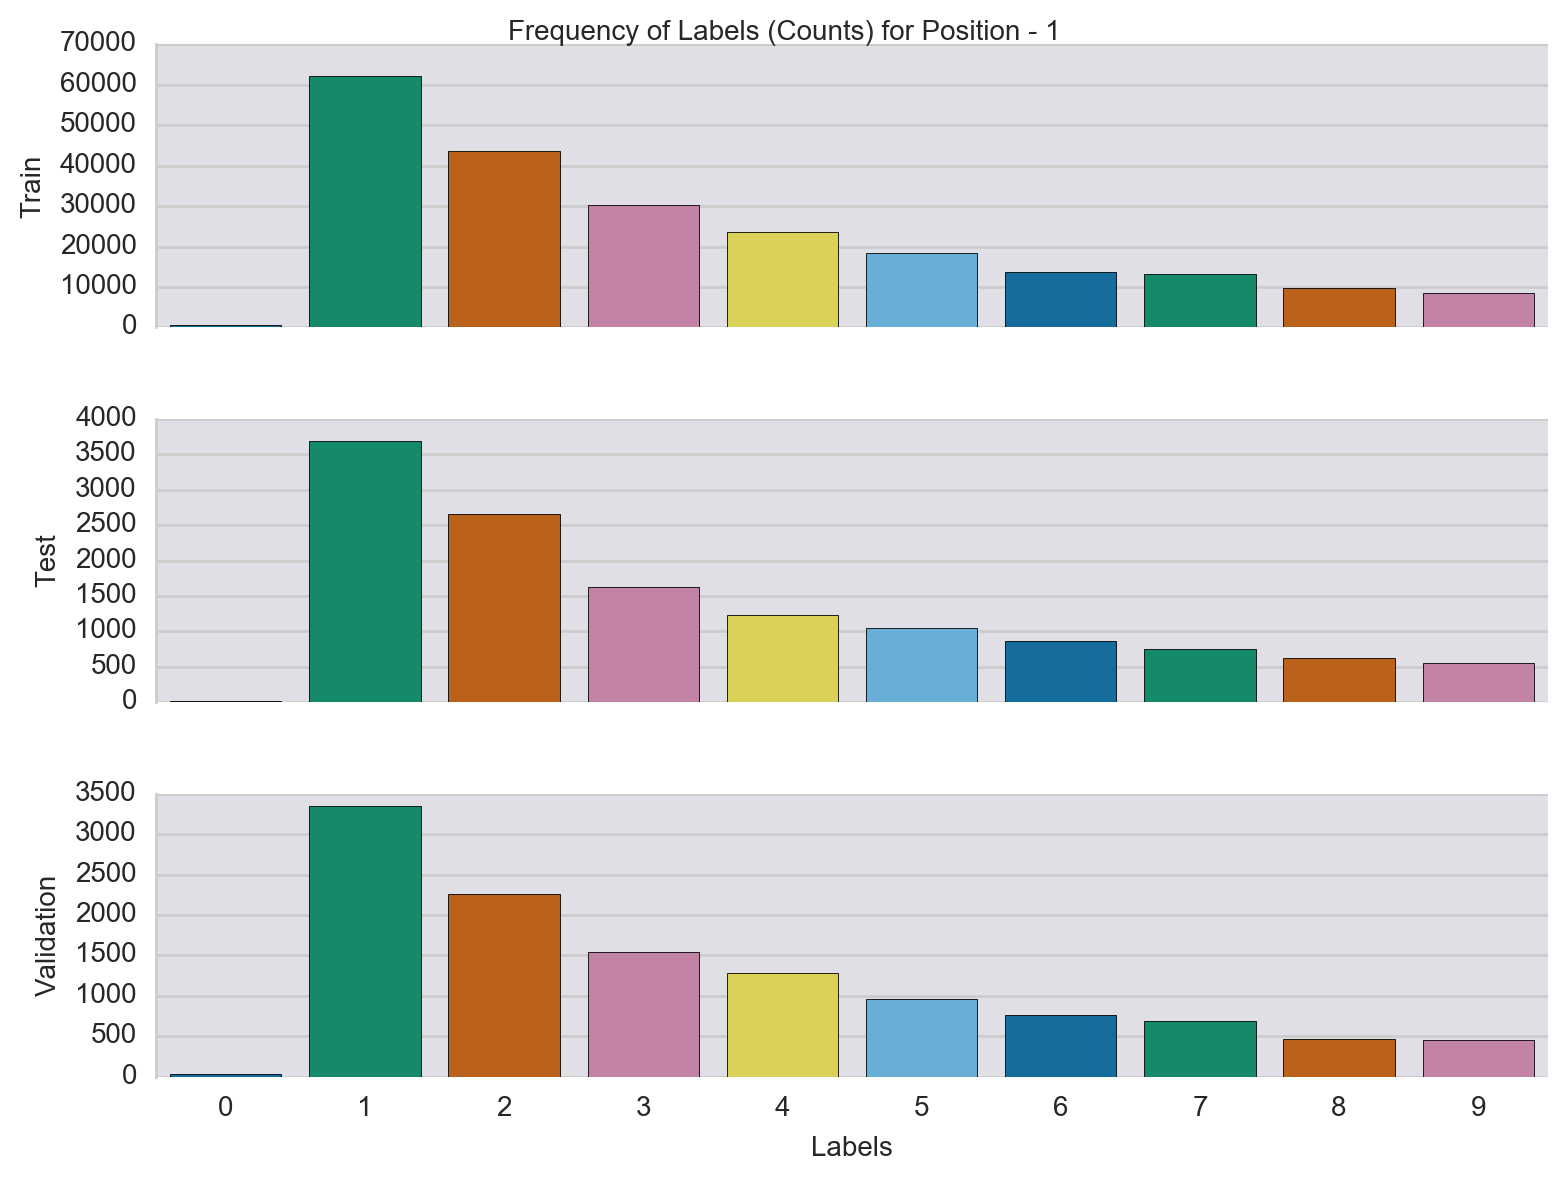

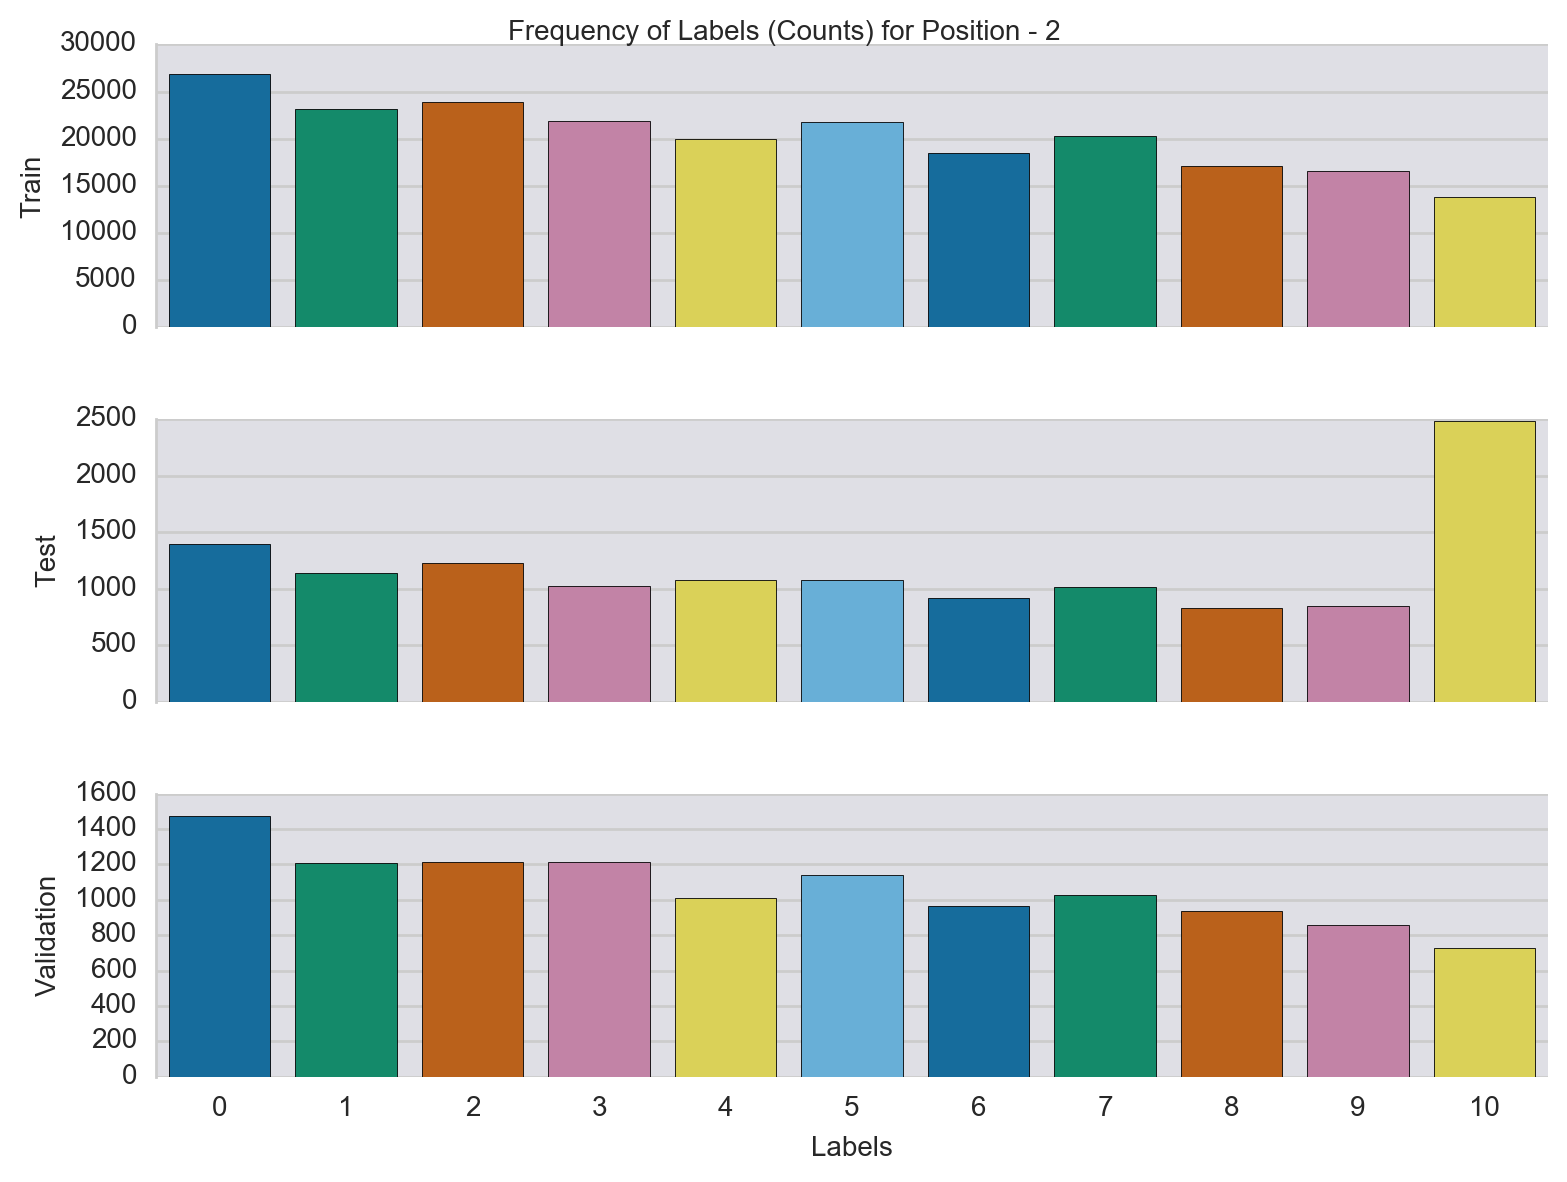

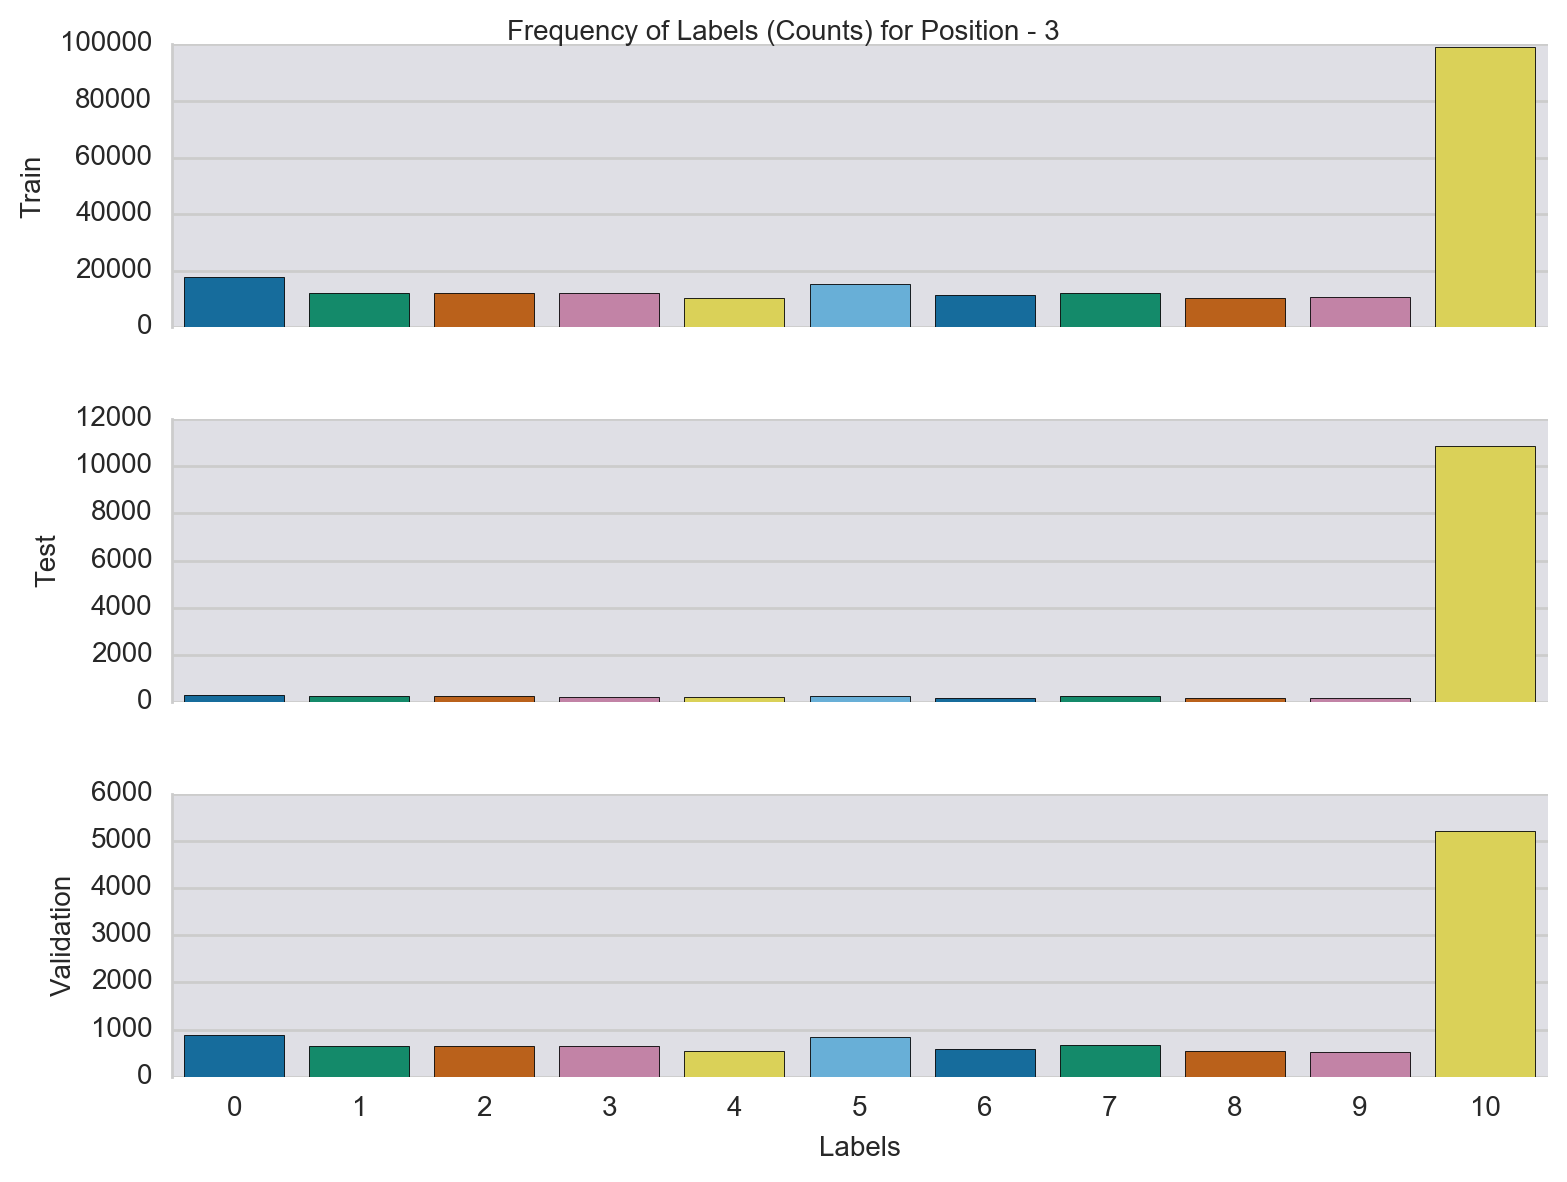

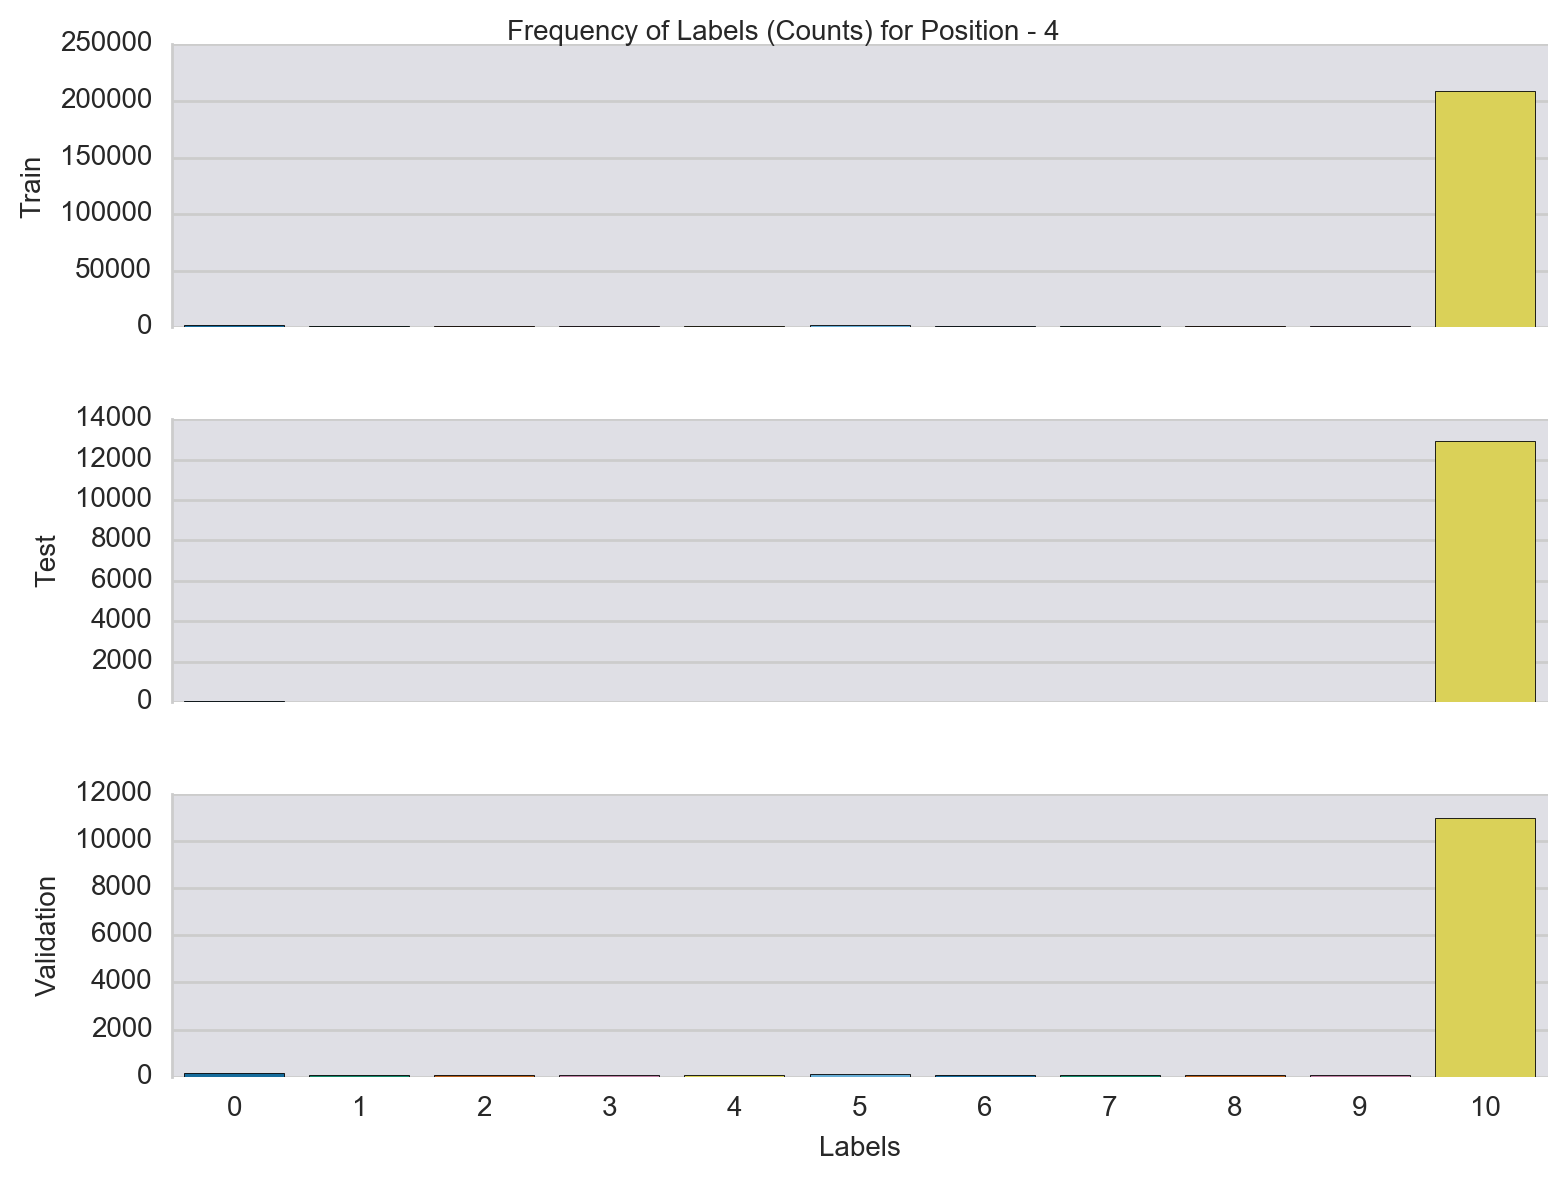

In [6]:
def graph(indx):
    # position 5 is kinda funky
    assert(indx < 5)
    # Set up the matplotlib figure
    f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

    train_unique, train_counts = np.unique(train_labels[:, indx], return_counts=True)
    sns.barplot(train_unique, train_counts, palette="colorblind", ax=ax1)
    ax1.set_ylabel("Train")

    test_unique, test_counts = np.unique(test_labels[:, indx], return_counts=True)
    sns.barplot(test_unique, test_counts, palette="colorblind", ax=ax2)
    ax2.set_ylabel("Test")

    valid_unique, valid_counts = np.unique(valid_labels[:, indx], return_counts=True)
    # Randomly reorder the data to make it qualitative
    sns.barplot(valid_unique, valid_counts, palette="colorblind", ax=ax3)
    ax3.set_ylabel("Validation")

    # Finalize the plot
    sns.despine(bottom=True)
    # plt.setp(f.axes)
    plt.xlabel("Labels")
    if indx == 0:
        plt.suptitle('Frequency of Labels (Counts) of Digit Length'.format(indx), fontsize=10)
    else:
        plt.suptitle('Frequency of Labels (Counts) for Position - {}'.format(indx), fontsize=10)
    plt.tight_layout(h_pad=2)
    plt.show()
    
for i in range(5):
    graph(i)

# Position 5 is kinda funky

In [7]:
from scipy.stats import itemfreq

array([[     0,     19],
       [     1,     13],
       [     2,      7],
       [     3,     11],
       [     4,      7],
       [     5,     12],
       [     6,     13],
       [     7,     15],
       [     8,      7],
       [     9,     15],
       [    10, 223853]])

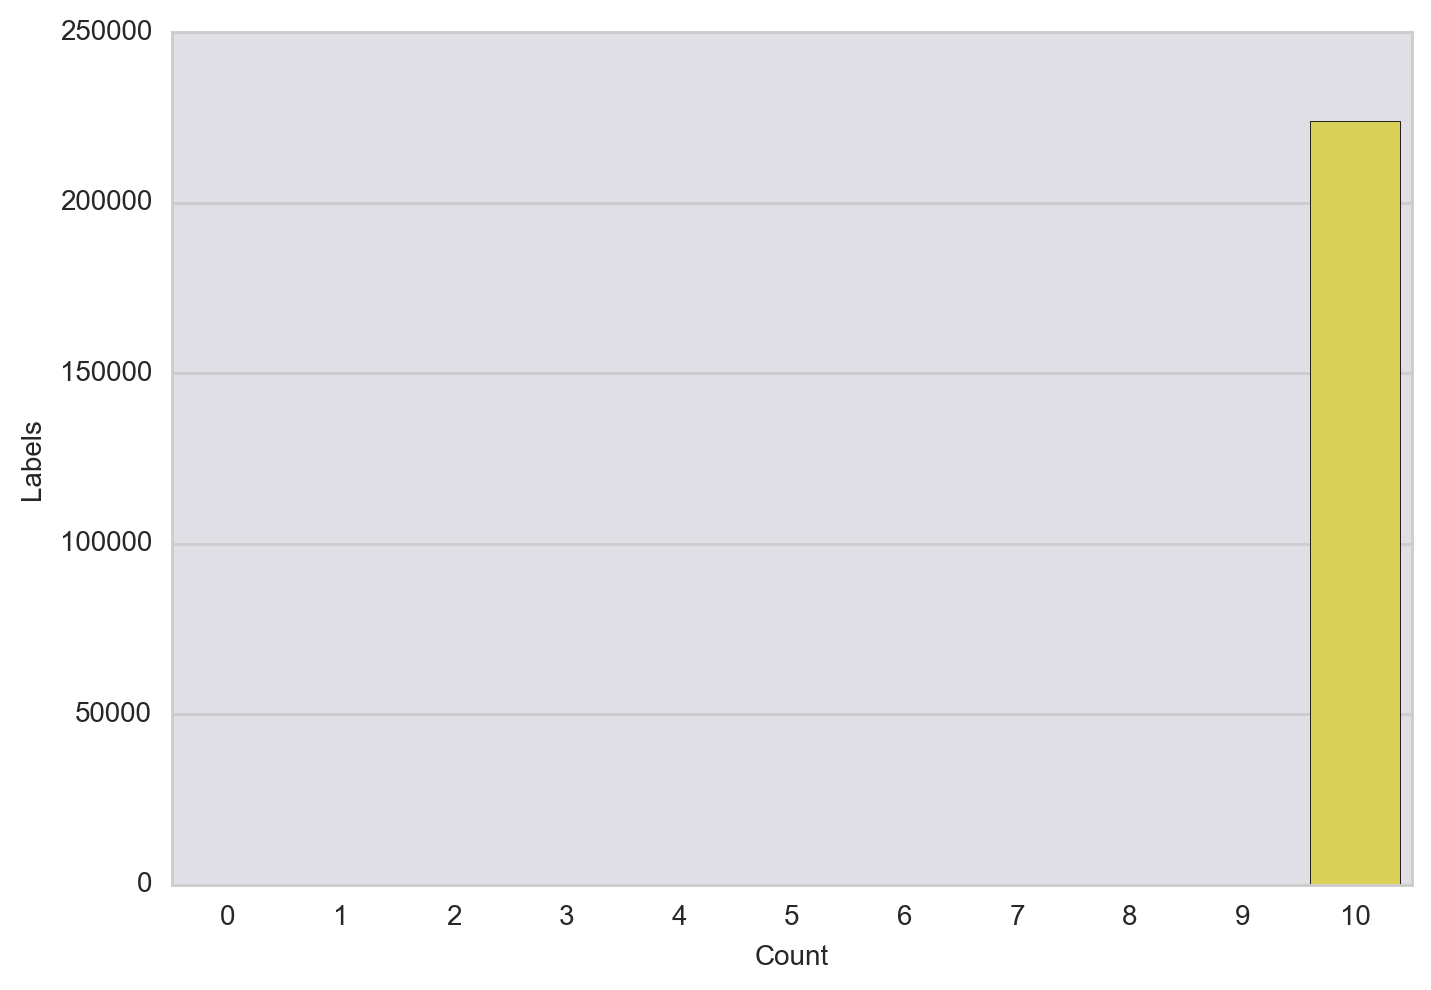

In [8]:
sns.barplot(itemfreq(train_labels[:, 5])[:, 0], itemfreq(train_labels[:, 5])[:, 1], palette="colorblind")
plt.xlabel("Count")
plt.ylabel("Labels");
itemfreq(train_labels[:, 5])

# Validation does not have all 10 numbers represented

array([[    0,     1],
       [    7,     1],
       [   10, 13066]])

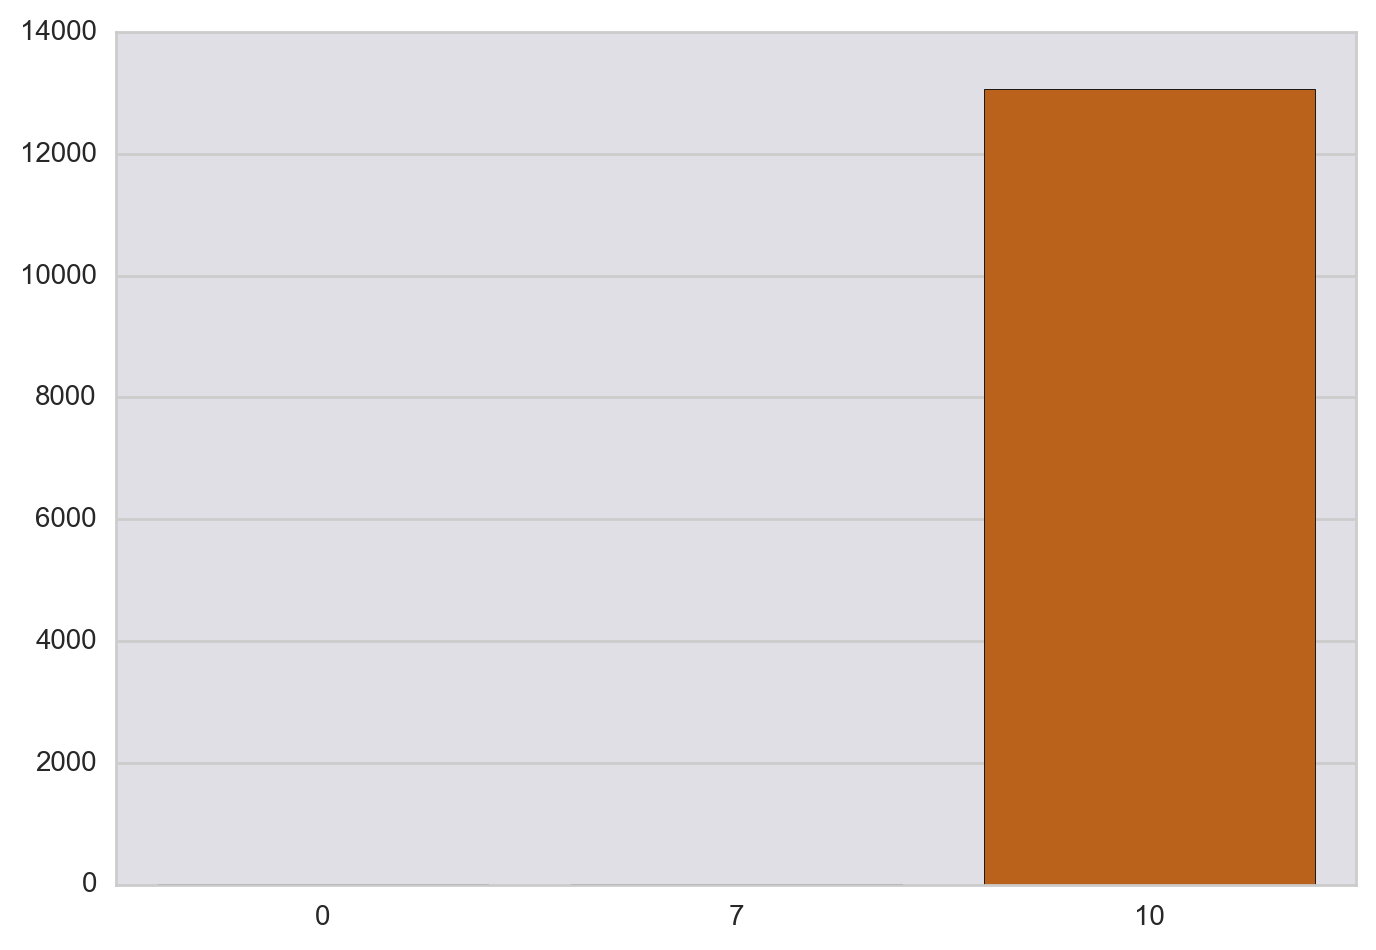

In [9]:
sns.barplot(itemfreq(test_labels[:, 5])[:, 0], itemfreq(test_labels[:, 5])[:, 1], palette="colorblind");
itemfreq(test_labels[:, 5])

# Test does not have all 10 numbers represented

array([[    1,     1],
       [    4,     1],
       [    6,     1],
       [    7,     1],
       [    9,     1],
       [   10, 11777]])

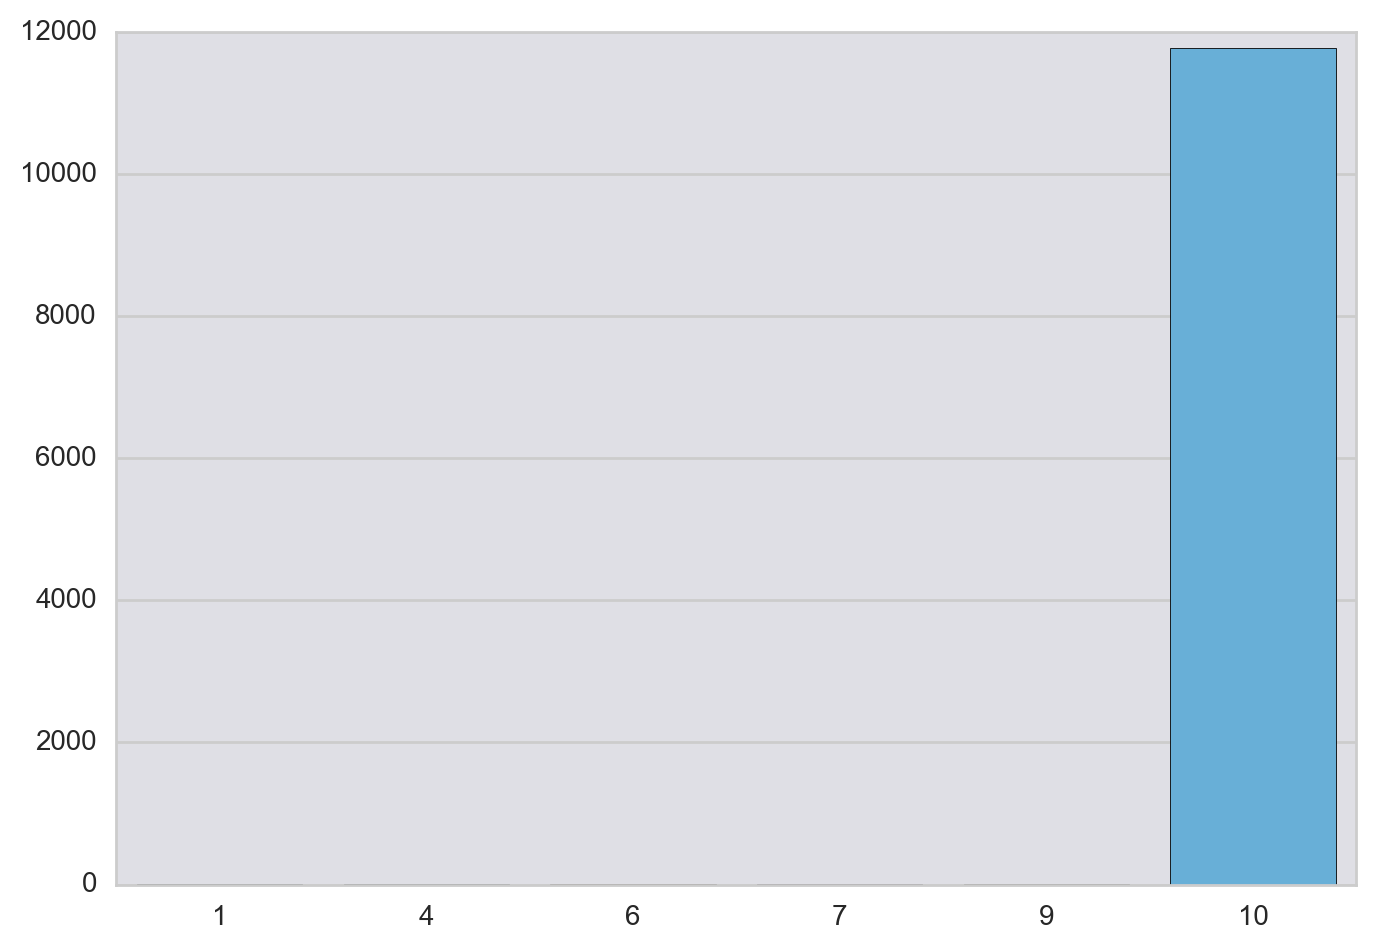

In [10]:
sns.barplot(itemfreq(valid_labels[:, 5])[:, 0], itemfreq(valid_labels[:, 5])[:, 1], palette="colorblind");
itemfreq(valid_labels[:, 5])